# Pair creation in collision of γ -ray beams produced with high-intensity lasers

https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.013201


Reproducing figures 1 and 2.

In [1]:
import numpy as np
from numpy import pi, sqrt, sin, cos, exp, log
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
from scipy import integrate
from scipy.constants import speed_of_light, hbar, elementary_charge, fine_structure, electron_mass, epsilon_0

In [2]:
re = elementary_charge**2/(4*pi*epsilon_0*electron_mass*speed_of_light**2) * 100; #[cm] classical electron radius
m_eV = electron_mass*speed_of_light**2/elementary_charge # [eV] electron mass

def sigmagg(s):
    """
    cross section of the BW process - equation 2
        input: s = Eg1 Eg2 (1-cos(phi))/2(mc^2)^2
        classical electron radius re = e^2 /4π ε0 me c^2 = 2.8 × 10−13 cm
    achieves its maximum at s ≃ 2 and then decreases asymptotically as 1/s 
    """
    if s<1:
        res = 0
    else:
        beta = sqrt(1-1/s)
        res = pi/2 * re**2 * (1-beta**2) * (-2*beta*(2-beta**2) + (3-beta**4)*log((1+beta)/(1-beta)) )
    return res

def taugg(Eg,T):
    """
    input: photon energy Eg[eV], temperature T[eV]
    output: tau_gammagamma[1/cm]
    """
    lambdaC = hbar/electron_mass/speed_of_light
    def F(nu):
        return 2/pi/re**2/nu**2 * integrate.quad( lambda x: 1/(exp(x)-1) * integrate.quad(lambda s: s*sigmagg(s), 0, x*nu)[0], 1/nu, np.inf )[0]
    nu = Eg * T / (m_eV)**2
    res = fine_structure**2/pi/lambdaC * (T/m_eV)**3 * F(nu)
    return res

### Figure 1: cross section versus $E_{\gamma 1}, E_{\gamma 2}$

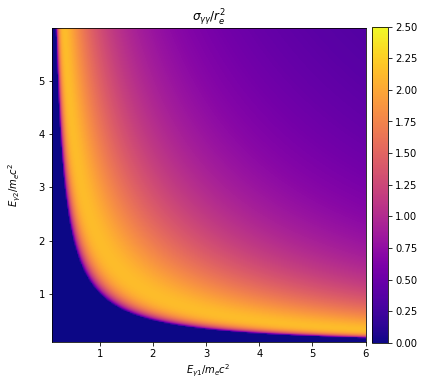

In [3]:
# figure 1 
Eg1lst = np.linspace(0.1,6,250); # energy [mc^2]
X1, X2 = np.meshgrid(Eg1lst, Eg1lst); #[_] meshgrid
phi = pi; #[]
sigmagglst = np.zeros((len(Eg1lst),len(Eg1lst)))
for i in range(len(Eg1lst)):
    for j in range(len(Eg1lst)):
        s = Eg1lst[i] * Eg1lst[j] * (1-cos(phi))/2; #[] center-of-mass relativistic invariant
        sigmagglst[i,j] = sigmagg(s)/re**2; #[]
sigmagglst[np.isnan(sigmagglst)]=0

# plot
fig, axes =  plt.subplots(nrows=1, ncols=1,figsize=(6,6))
im0 = axes.imshow(sigmagglst.T, interpolation='bilinear', origin='lower', extent=[min(Eg1lst), max(Eg1lst), min(Eg1lst), max(Eg1lst)],aspect=1, vmax=2.5, vmin=0, cmap=cm.plasma)
axes.images.append(im0)
axes.set_xlabel(r'$E_{\gamma1}/m_e c^2$')
axes.set_ylabel(r'$E_{\gamma2}/m_e c^2$',labelpad=15)
axes.set_yticks(np.arange(1,6,1))
cbar0 = fig.colorbar(im0, ax=axes,fraction=0.01*4.7, pad=0.02)
cbar0.set_ticks(np.arange(0,2.51,0.25))
cbar0.set_label(r'',labelpad=1,y=0.5)
axes.set_aspect(aspect=1)
plt.title(r'$\sigma_{\gamma\gamma}/r_e^2$')
plt.tight_layout()
#plt.savefig('figure1.pdf')
plt.show()

### Figure 2: Probability of BW pair creation per unit of length versus the incident photon energy Eγ for the thermal bath temperatur

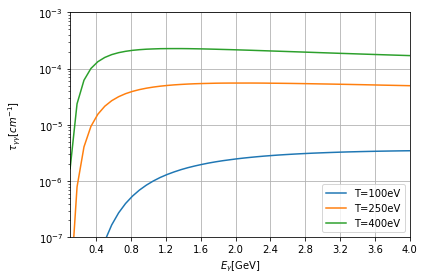

In [4]:
# figure 2
Eglst = np.linspace(0.1,4)*1e9 #[eV] photon energy
taugg100 = np.array([taugg(Eg,100) for Eg in Eglst])*1e-2 #[cm] probability. multiply by 10^-2 to convert to cm
taugg250 = np.array([taugg(Eg,250) for Eg in Eglst])*1e-2
taugg400 = np.array([taugg(Eg,400) for Eg in Eglst])*1e-2

# plot
plt.plot(Eglst*1e-9,taugg100,label=r'T=100eV')
plt.plot(Eglst*1e-9,taugg250,label=r'T=250eV')
plt.plot(Eglst*1e-9,taugg400,label=r'T=400eV')
plt.yscale('log')
plt.xlim([0.1,4])
plt.ylim([1e-7,1e-3])
plt.xticks(np.arange(0.4,4.1,0.4))
plt.grid()
plt.legend()
plt.xlabel(r'$E_{\gamma}$[GeV]')
plt.ylabel(r'$\tau_{\gamma\gamma}[cm^{-1}]$',labelpad=15)
plt.tight_layout()
#plt.savefig('figure2.pdf')
plt.show()